In [14]:
## import from csv, clean, and reformat df
# Replace - with W and + with S in meter and stress
# deduplicate
#fill missing values with "none"

import pandas as pd

df = pd.read_csv('/Users/bsg25/metricalgpt/saved_corpora_scansions_results/gemini/gemini_parsed_to_analyze2.csv') # csvfilepath here
df['meter'] = df['meter_y'].str.replace('-', 'W').str.replace('+', 'S')
df['stress'] = df['stress'].str.replace('-', 'W').str.replace('+', 'S')

In [ ]:
df

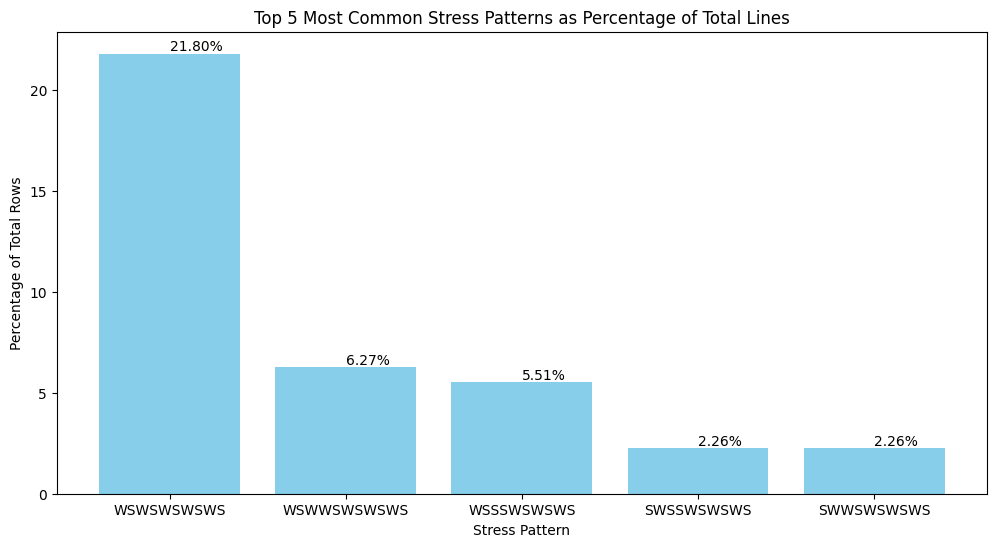

In [15]:
import matplotlib.pyplot as plt
# Calculate the frequency of each stress pattern
stress_counts = df['stress'].value_counts().head(5)
# Calculate the percentage of each stress pattern
stress_percentage = (stress_counts / len(df)) * 100
# Plotting the graph
plt.figure(figsize=(12, 6))
bars = plt.bar(stress_percentage.index, stress_percentage.values, color='skyblue')
plt.xlabel('Stress Pattern')
plt.ylabel('Percentage of Total Rows')
plt.title('Top 5 Most Common Stress Patterns as Percentage of Total Lines')
# Label each bar with the percentage value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', va='bottom')

plt.show()

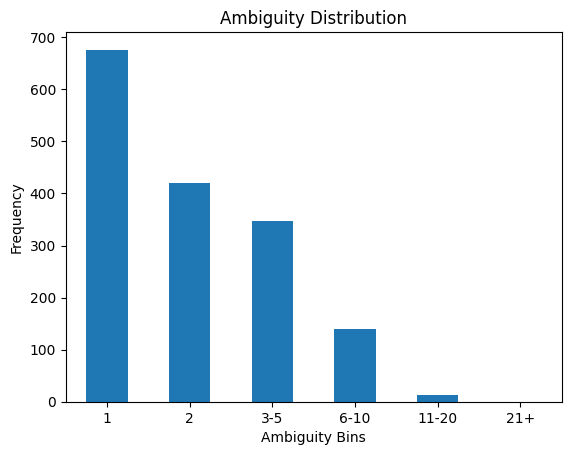

In [16]:
import matplotlib.pyplot as plt
# Define bins and labels
bins = [1, 2, 3, 6, 11, 21, float('inf')]
labels = ['1', '2', '3-5', '6-10', '11-20', '21+']
# Bin the 'ambig' column
df['ambig_binned'] = pd.cut(df['ambig'], bins=bins, labels=labels, right=False)
# Plotting the binned ambiguity
df['ambig_binned'].value_counts().sort_index().plot(kind='bar')
plt.title('Ambiguity Distribution')
plt.xlabel('Ambiguity Bins')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

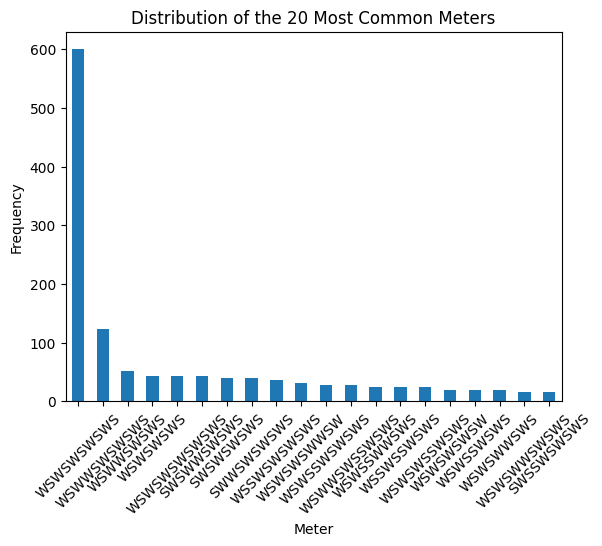

In [17]:
import matplotlib.pyplot as plt
# Get the distribution of the 20 most common meters
meter_distribution = df['meter'].value_counts().head(20)
# Create a DataFrame for the meter distribution
newdf = pd.DataFrame(meter_distribution).reset_index()
newdf.columns = ['meter', 'count']
# Plotting the distribution of the 20 most common meters
newdf.plot(kind='bar', x='meter', y='count', legend=False)
plt.title('Distribution of the 20 Most Common Meters')
plt.xlabel('Meter')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

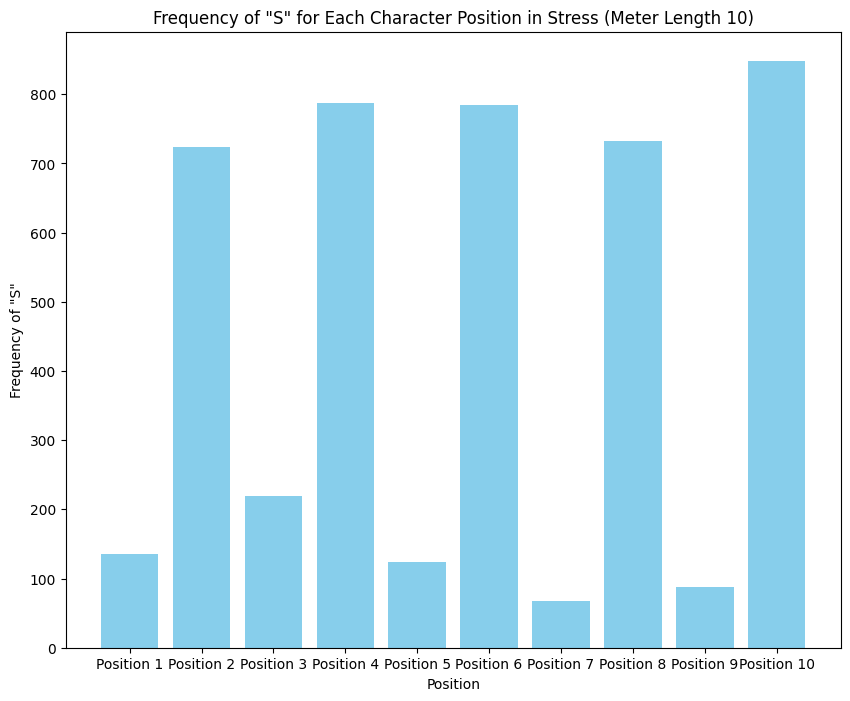

In [18]:
import matplotlib.pyplot as plt
# Filter rows where meter length is 10
decadf = df[df['meter'].str.len() == 10]
# Calculate frequency of '+' for each character position in 'stress'
frequency = {f'Position {i+1}': decadf['stress'].str[i].value_counts().get('S', 0) for i in range(10)}
# Convert the result to a DataFrame
decadf = pd.DataFrame(list(frequency.items()), columns=['Position', 'Frequency'])
# Plot the frequency of '+' for each character position
plt.figure(figsize=(10, 8))
plt.bar(decadf['Position'], decadf['Frequency'], color='skyblue')
plt.xlabel('Position')
plt.ylabel('Frequency of "S"')
plt.title('Frequency of "S" for Each Character Position in Stress (Meter Length 10)')
plt.show()

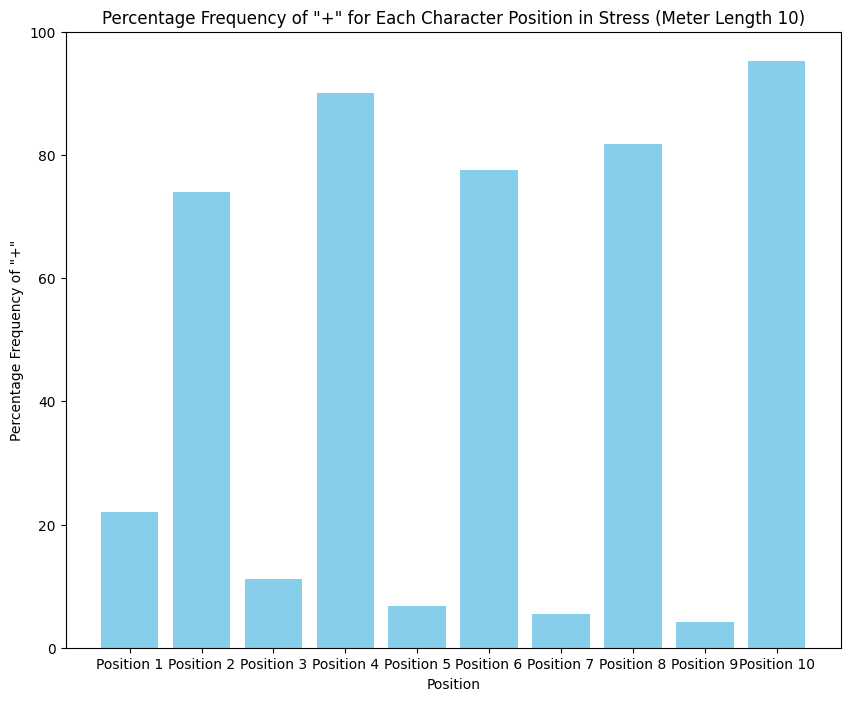

In [39]:
import matplotlib.pyplot as plt
# Filter rows where meter length is 10
decadf = df[df['meter'].str.len() == 10]
# Calculate percentage frequency of '+' for each character position in 'stress'
frequency = {f'Position {i+1}': (decadf['stress'].str[i].value_counts().get('+', 0) / len(decadf)) * 100 for i in range(10)}
# Convert the result to a DataFrame
decadf = pd.DataFrame(list(frequency.items()), columns=['Position', 'Percentage Frequency'])
# Plot the percentage frequency of '+' for each character position
plt.figure(figsize=(10, 8))
plt.bar(decadf['Position'], decadf['Percentage Frequency'], color='skyblue')
plt.xlabel('Position')
plt.ylabel('Percentage Frequency of "+"')
plt.title('Percentage Frequency of "+" for Each Character Position in Stress (Meter Length 10)')
plt.show()

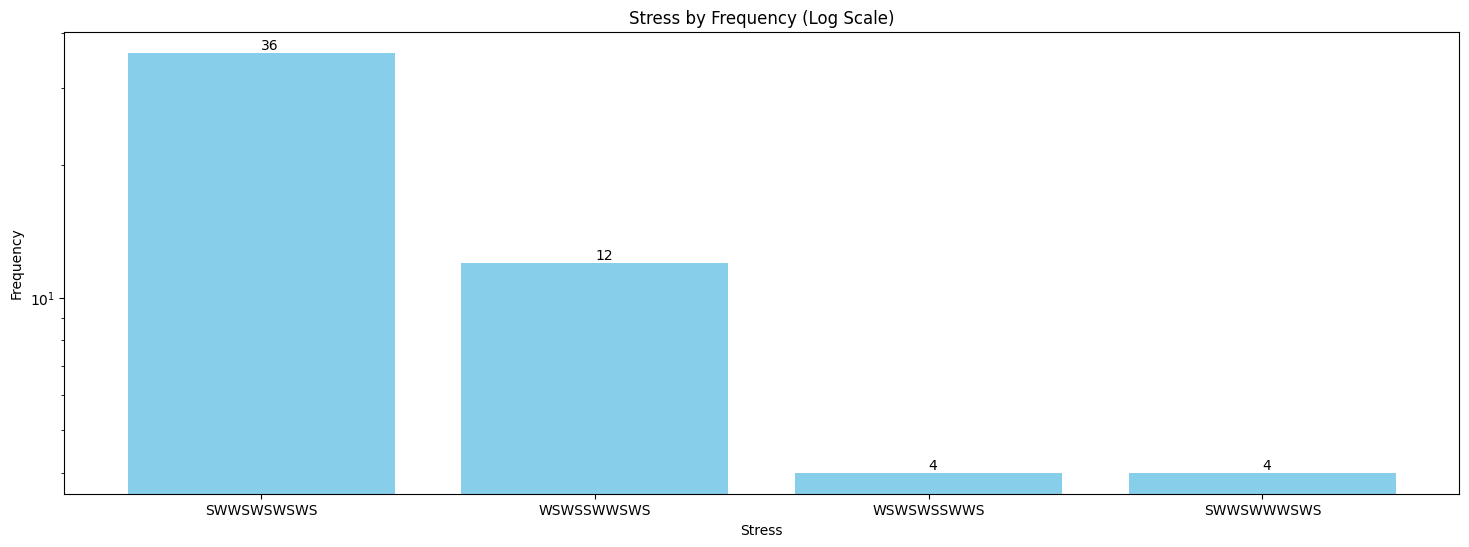

In [19]:
stress_patterns = ['SWWSWSWSWS', 'WSSWWSWSWS', 'WSWSSWWSWS', 'WSWSWSSWWS', 'WSWSWSWSSW', 'SWWSSWWSWS', 'WSSWWSSWWS', 'SWSWWSWSWS', 'WSSWSWWSWS', 'SWWSWWWSWS']
trocheedf = df[df['stress'].isin(stress_patterns)]


import matplotlib.pyplot as plt
# Group by 'stress' and count frequencies
stress_frequency = trocheedf['stress'].value_counts().reset_index()
stress_frequency.columns = ['stress', 'frequency']
# Plotting the graph with logarithmic scale
plt.figure(figsize=(18, 6))
bars = plt.bar(stress_frequency['stress'], stress_frequency['frequency'], color='skyblue')
plt.yscale('log')
plt.xlabel('Stress')
plt.ylabel('Frequency')
plt.title('Stress by Frequency (Log Scale)')
# Label each bar with total count
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom') 

plt.show()

In [26]:
# Calculate the number of rows that contain 'SWWS' in the 'stress' column
num_string = df[df['stress'].str.contains('SWSWWS')].shape[0]

# Calculate the percentage
percentage_string = (num_string / df.shape[0]) * 100

percentage_string

8.020050125313283